In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import folium
from folium.plugins import HeatMap
from IPython.display import display


In [ ]:
plt.style.use('ggplot')  
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'DejaVu Sans'  
plt.rcParams['font.size'] = 12



In [ ]:
df = pd.read_csv("Bank-Owned_ATM_Locations_in_New_York_State.csv")
df.head()  


,Name of Institution,Street Address,City,ZIP Code,County,Georeference
0,ACMG Federal Credit Union,1753 MILTON AVENUE,SOLVAY,13209.0,Onondaga,POINT (-76.20518 43.06087)
1,ACMG Federal Credit Union,4659 ONONDAGA BOULEVARD,SYRACUSE,13219.0,Onondaga,POINT (-76.19225 43.03315)
2,ACMG Federal Credit Union,4800 SOUTH SALINA STREET,SYRACUSE,13205.0,Onondaga,POINT (-76.14277 43.00059)
3,Abacus Federal Savings Bank,36-30 MAIN STREET,FLUSHING,11354.0,Queens,POINT (-73.83159 40.76234)
4,Abacus Federal Savings Bank,4824 8TH AVENUE,BROOKLYN,11220.0,Kings,POINT (-74.00303 40.64176)


In [ ]:
df = df.dropna(subset=['Name of Institution', 'City', 'County', 'Georeference'])
coords = df['Georeference'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
df['Longitude'] = coords[0].astype(float)
df['Latitude'] = coords[1].astype(float)
df['Institution Type'] = df['Name of Institution'].apply(lambda x: 'Credit Union' if 'Credit Union' in x else 'Bank')
df.head()  


,Name of Institution,Street Address,City,ZIP Code,County,Georeference,Longitude,Latitude,Institution Type
0,ACMG Federal Credit Union,1753 MILTON AVENUE,SOLVAY,13209.0,Onondaga,POINT (-76.20518 43.06087),-76.20518,43.06087,Credit Union
1,ACMG Federal Credit Union,4659 ONONDAGA BOULEVARD,SYRACUSE,13219.0,Onondaga,POINT (-76.19225 43.03315),-76.19225,43.03315,Credit Union
2,ACMG Federal Credit Union,4800 SOUTH SALINA STREET,SYRACUSE,13205.0,Onondaga,POINT (-76.14277 43.00059),-76.14277,43.00059,Credit Union
3,Abacus Federal Savings Bank,36-30 MAIN STREET,FLUSHING,11354.0,Queens,POINT (-73.83159 40.76234),-73.83159,40.76234,Bank
4,Abacus Federal Savings Bank,4824 8TH AVENUE,BROOKLYN,11220.0,Kings,POINT (-74.00303 40.64176),-74.00303,40.64176,Bank


In [27]:
# Top 10 cities by number of ATMs
city_counts = df['City'].value_counts().head(10)

# Top city
top_city = city_counts.index[0]

# Top banks in top city
top_city_df = df[df['City'] == top_city]
top_banks_top_city = top_city_df['Name of Institution'].value_counts().head(10)

city_counts, top_city, top_banks_top_city

# Top 10 counties by number of ATMs
county_counts = df['County'].value_counts().head(10)

# Counties with less than 5 ATMs (investment opportunities)
low_atm_counties = df['County'].value_counts()
low_atm_counties = low_atm_counties[low_atm_counties < 5]

county_counts, low_atm_counties

nyc_counties = ['New York', 'Kings', 'Queens', 'Bronx', 'Richmond']
nyc_df = df[df['County'].isin(nyc_counties)]

# Top 10 banks in NYC
top_banks_nyc = nyc_df['Name of Institution'].value_counts().head(10)

# ATM counts by NYC county
nyc_county_counts = nyc_df['County'].value_counts()

nyc_df, top_banks_nyc, nyc_county_counts

# Institution Type
institution_counts = df['Institution Type'].value_counts()
nyc_institution_counts = nyc_atms['Institution Type'].value_counts()

# نمایش نتایج اولیه
print("Top Cities:\n", city_counts)
print("\nTop Counties:\n", county_counts)
print("\nNYC Top Banks:\n", top_banks_nyc)
print("\nInstitution Types:\n", institution_counts)


Top Cities:
 City
New York         349
Brooklyn         225
NEW YORK         182
BROOKLYN         111
Rochester         99
Bronx             85
Buffalo           68
Staten Island     64
Albany            52
Syracuse          51
Name: count, dtype: int64

Top Counties:
 County
New York       552
Nassau         418
Suffolk        392
Queens         348
Kings          333
Westchester    256
Erie           254
Monroe         226
Onondaga       175
Albany         143
Name: count, dtype: int64

NYC Top Banks:
 Name of Institution
JPMorgan Chase Bank, National Association    295
Citibank N. A.                               168
TD Bank N.A.                                 152
Bank of America N.A. GA1-006-15-40           138
Santander Bank                                66
Flagstar Bank, N.A.                           65
Apple Bank                                    50
Capital One, N.A.                             48
Wells Fargo ATM                               46
Citizens Bank                

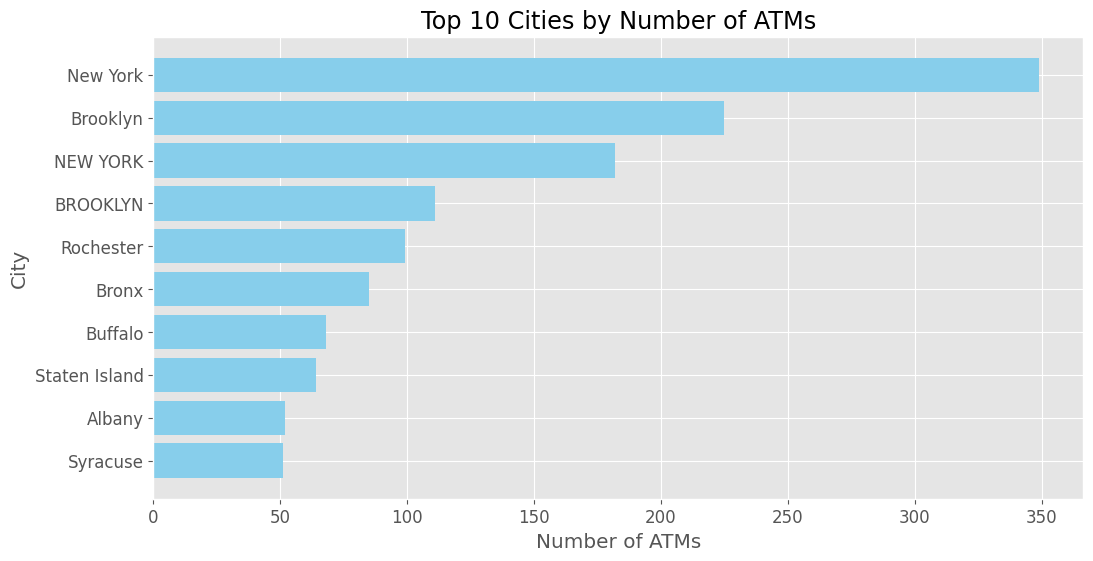

In [30]:
plt.figure(figsize=(12,6))
plt.barh(city_counts.index[::-1], city_counts.values[::-1], color='skyblue')
plt.xlabel('Number of ATMs')
plt.ylabel('City')
plt.title('Top 10 Cities by Number of ATMs')
plt.show()


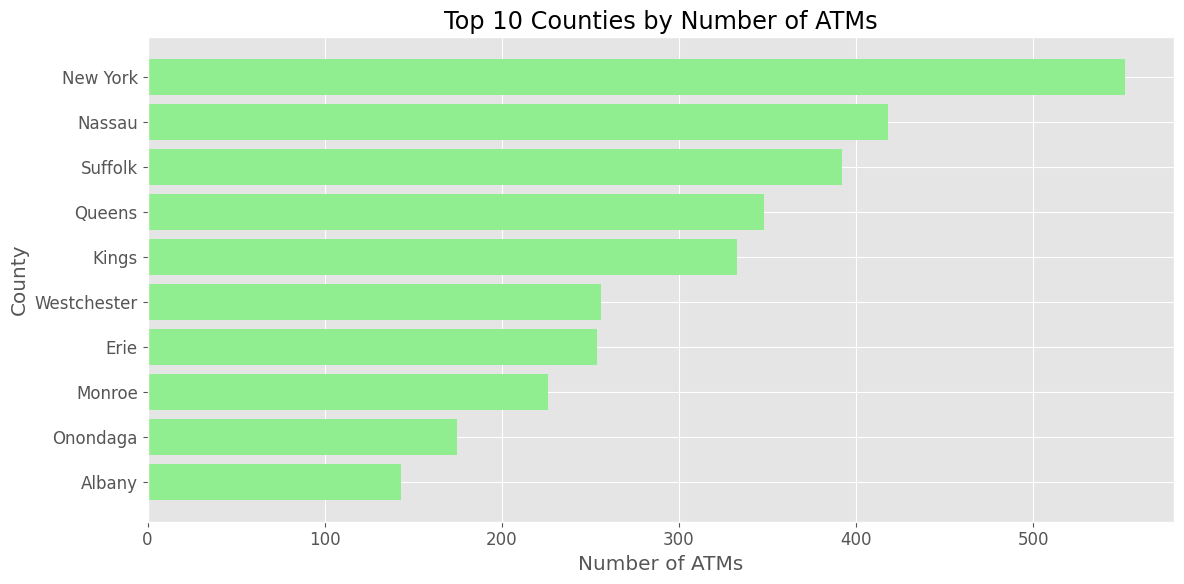

In [29]:
# Top 10 Counties
plt.figure(figsize=(12,6))
plt.barh(county_counts.index[::-1], county_counts.values[::-1], color='lightgreen')
plt.xlabel('Number of ATMs')
plt.ylabel('County')
plt.title('Top 10 Counties by Number of ATMs')
plt.tight_layout()
plt.savefig('top_10_counties_atm.png', dpi=300)
plt.show()

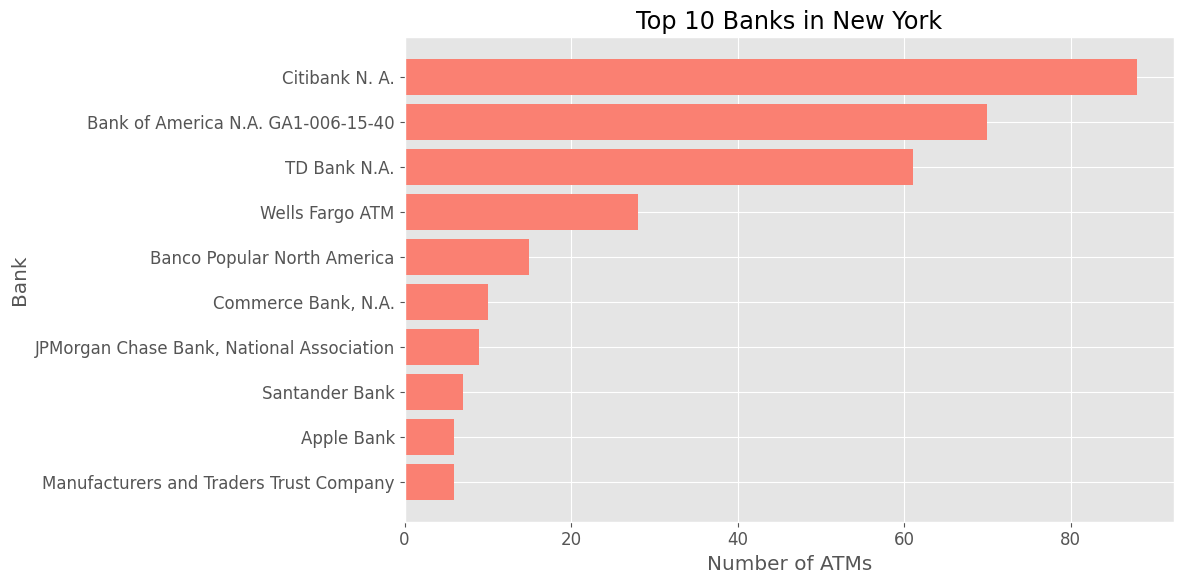

In [28]:
# Top Banks in Top City
plt.figure(figsize=(12,6))
plt.barh(top_banks_top_city.index[::-1], top_banks_top_city.values[::-1], color='salmon')
plt.xlabel('Number of ATMs')
plt.ylabel('Bank')
plt.title(f'Top 10 Banks in {top_city}')
plt.tight_layout()
plt.savefig(f'top_10_banks_{top_city.lower().replace(" ", "_")}_atm.png', dpi=300)
plt.show()

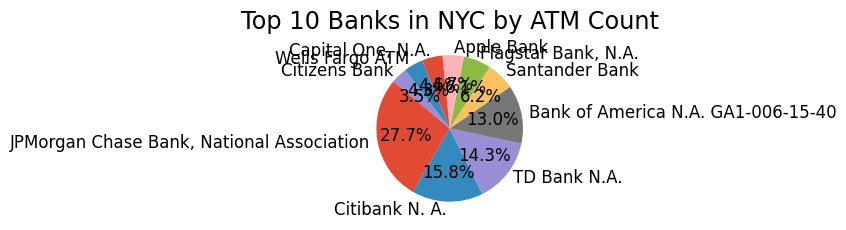

In [31]:
# Pie chart for NYC banks
plt.figure(figsize=(8,8))
plt.pie(top_banks_nyc, labels=top_banks_nyc.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Banks in NYC by ATM Count')
plt.tight_layout()
plt.savefig('nyc_atm_pie.png', dpi=300)
plt.show()

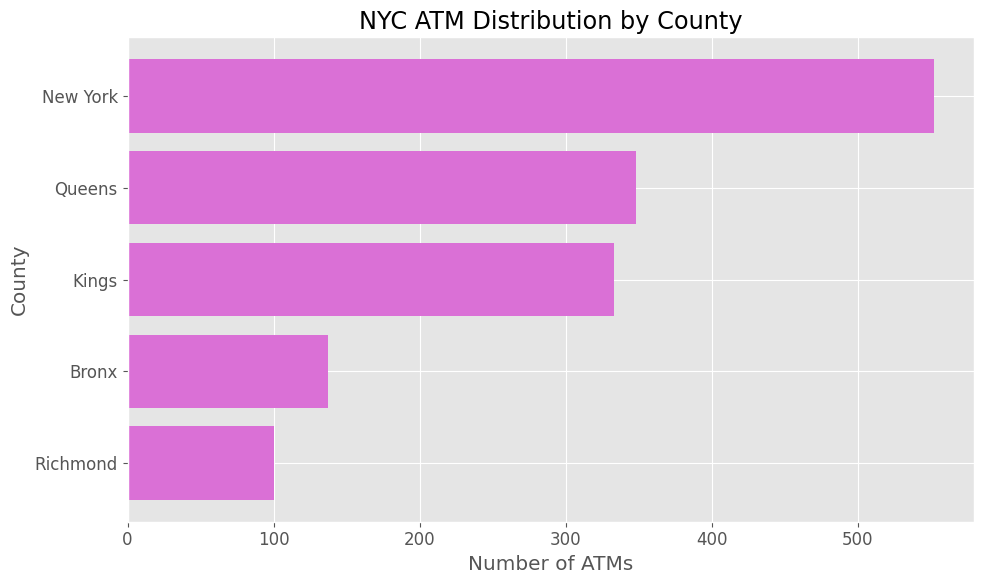

In [32]:
# Bar chart for NYC counties
plt.figure(figsize=(10,6))
plt.barh(nyc_county_counts.index[::-1], nyc_county_counts.values[::-1], color='orchid')
plt.xlabel('Number of ATMs')
plt.ylabel('County')
plt.title('NYC ATM Distribution by County')
plt.tight_layout()
plt.savefig('nyc_atm_by_county.png', dpi=300)
plt.show()